In [1]:
# 1. Perform necessary data preprocessing, e.g. removing punctuation and stop words, stemming, lemmatizing. 
# You may use the outputs from previous weekly assignments.
# Cleaning the input data file

#removing all tags from the input file
import re
#using nltk
import nltk
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import pickle
from nltk.corpus import stopwords
nltk_stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from collections import defaultdict
import re
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

# Read the input text file
with open('E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Assignment_6\\webpage_data.txt', 'r') as file:
    text = file.read()

# Define regular expressions to match the JavaScript functions to remove
functions_to_remove = [
    r'Search{"path":.*?\}Skip to main',  # Match and remove JavaScript variables
    r'{"path":.*?\}Skip to main',  # Match and remove JavaScript variables
    r'function focusIt\(\) \{[\s\S]*?\}\);Skip to main',
    r'function focusIt\(\) \{[\s\S]*? \}\);',
    r'\$\(.*?\}\);',
    r'window\.dataLayer = window\.dataLayer \|\| \[\];\s*function gtag\(\)\{dataLayer\.push\(arguments\);\}\s*gtag\(\'js\', new Date\(\)\);\s*gtag\(\'config\', \'UA-41988811-1\', \{[^}]+\}\);'

]

# Remove the matched functions
for pattern in functions_to_remove:
    text = re.sub(pattern, '', text, flags=re.DOTALL)

tokens_text = word_tokenize(text)

#print(tokens_text)

# Remove non-alphanumeric items, empty strings, and whitespace strings
filtered_list = [item for item in tokens_text if re.match(r'^[a-zA-Z0-9]*$', item) is not None]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_list = [word for word in filtered_list if word not in stop_words]
filtered_list = [word.lower() for word in filtered_list]

# Print the filtered list without stopwords
#print(filtered_list)

lemmatizer = WordNetLemmatizer()

# Perform lemmatization
lemmatized_list = [lemmatizer.lemmatize(word) for word in filtered_list]

# Print the stemmed and lemmatized list
#print(lemmatized_list)


#1. Cleaning the input file without punctuation and stop words in the data files. 

# Specify the path for the output file to save the tokenized text
output_file_path = "E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Assignment_6\\q1_cleaned_output.txt"

# Write the tokenized text to the output file
with open(output_file_path, 'w') as output_file:
    output_file.write(str(lemmatized_list))

print("Remove punctuation and stop words in the data files text written to:", output_file_path)

Remove punctuation and stop words in the data files text written to: E:\MS_Course_Notes\COMP_293C\Assignments\Assignment_6\q1_cleaned_output.txt


## 2. Propose a binary classification problem from your project data and identify the columns that you will use to solve the problem. You may need to create new columns of data.
# Binary Classification Problem: Identifying Programs and general University data

## Classification is based on the Programs
As project is a university chatbot I am trying to create a binary classification model to determine whether the text refers to a program related data or general university data. The data set has the general data like pacific card, housing, dinning and course related information. So here I spliting the academic related data and non academic data in separate labels.

## Dataset
The a dataset that contains various paragraphs related to educational programs and general FAQ in the university. Each paragraph is associated with a label indicating whether it's about a "non academic" (Class 0) or an "academic" (Class 1).

## Columns Used
1. **Text Data (Paragraphs):** We use the text data column containing the paragraphs that describe different educational programs. This text data is essential for extracting information to make classification decisions.

2. **Target Label (Class):** We have a target label column (Class) to identify whether each paragraph corresponds to a "academic" or an "non academic."

### Explanation
After calculating the frequency of academic keywords and non acdemic keywords so I am proceeding with those words. So that the dataset is balanced.


In [2]:
#calculating with the frequency of the words to procceed with the binary classification

import re
import nltk
from nltk.corpus import stopwords
from collections import Counter


# Tokenize the text into words
words = nltk.word_tokenize(text)

# Convert words to lowercase
words = [word.lower() for word in words]

# Remove stopwords and punctuation
stop_words = set(stopwords.words("english"))
words = [word for word in lemmatized_list if word.isalpha() and word not in stop_words]

# Count word frequencies
word_counts = Counter(words)

# Find the most common words
most_common_words = word_counts.most_common(10)  # Change the number as needed

# Print the most common words
for word, count in most_common_words:
    print(f"{word}: {count}")


student: 878
program: 569
pacific: 348
application: 341
university: 287
graduate: 277
course: 234
admission: 229
scholarship: 221
eligible: 216


In [3]:
# Read the input text file
with open('E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Project\\Full_Cleaned_input.txt', 'r', encoding='utf-8') as file:
    text = file.read()
    
input_text = text

# Add spaces after question marks and appropriate punctuation at the end of each line
formatted_text = re.sub(r'(\w)\?(\w)', r'\1? \2', input_text)
formatted_text = re.sub(r'(\w)\.', r'\1. ', formatted_text)

# Print the updated input data
#print(formatted_text)

In [4]:
#creating a new column for the binary classification
import re

# Define the keywords related to academic
keywords = ['graduate','undergraduate','program','degree','academic',
            'student','application','international','scholarship','eligible',
            'admission','financial','aid','research','course','school',
            'Bachelor','master','academic','semester','eligibility','science'
           'education','prerequisite','gpa','research','score','fee']

# Define a function to check if any of the keywords are in a paragraph
def contains_keyword(paragraph):
    for keyword in keywords:
        if re.search(keyword, paragraph, re.IGNORECASE):
            return 1  # Label as 1 if a keyword is found
    return 0  # Return None for paragraphs without either keyword

# Split the text data into paragraphs (assuming paragraphs are separated by a period followed by a space)
paragraphs = re.split(r'(?<=[.!?])\s+', formatted_text)

# Create a list of (label, paragraph) pairs, excluding None values
labeled_paragraphs = [(label, paragraph) for label, paragraph in [(contains_keyword(paragraph), paragraph) for paragraph in paragraphs] if label is not None]

#print(labeled_paragraphs)

# Initialize counters for labels
count_0 = 0
count_1 = 0

# Iterate through the labeled paragraphs to count the labels
#showing the datatset with is almost balanced
for label, _ in labeled_paragraphs:
    if label == 0:
        count_0 += 1
    elif label == 1:
        count_1 += 1

# Print the counts
print("Count of label 0:", count_0)
print("Count of label 1:", count_1)


Count of label 0: 4362
Count of label 1: 4495


In [5]:
# Write the labeled data to a new file
with open("E:\\MS_Course_Notes\\COMP_293C\\Assignments\\Assignment_6\\labeled_data.txt", "w") as file:
    for label, paragraph in labeled_paragraphs:
        file.write(f"{label}\t{paragraph}\n")


In [6]:
#1. Spliting the data set into test and train dataset
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X = [paragraph for label, paragraph in labeled_paragraphs]
y = [label for label, paragraph in labeled_paragraphs]

# Split the dataset into training and test sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#3. Compute TF-IDF vectors on the text data. 
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [8]:
#4. Solve your binary classification problem with the Naïve Bayes classifier.

from sklearn.naive_bayes import MultinomialNB

# Create a Naïve Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier using the TF-IDF vectors and corresponding labels
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test_tfidf)


Naïve Bayes Accuracy: 0.7951467268623025
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75       873
           1       0.73      0.95      0.82       899

    accuracy                           0.80      1772
   macro avg       0.83      0.79      0.79      1772
weighted avg       0.83      0.80      0.79      1772



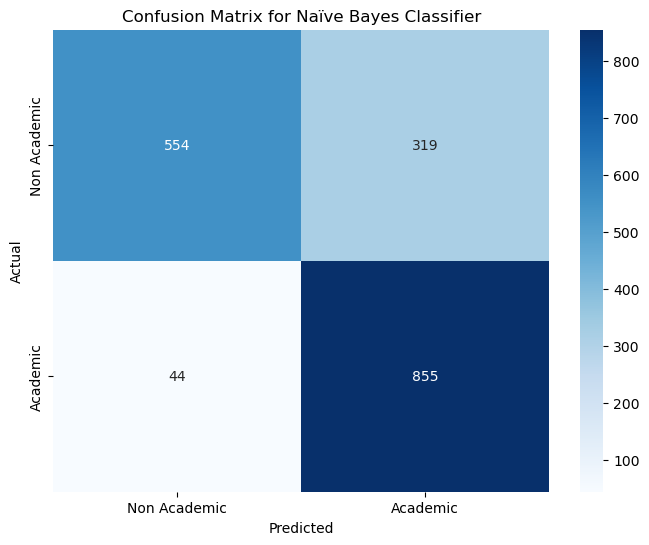

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using the trained Naïve Bayes classifier and the TF-IDF vectors for test data
nb_y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Calculate accuracy for the Naïve Bayes classifier
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Naïve Bayes Accuracy:", nb_accuracy)

# Generate a classification report for the Naïve Bayes classifier
nb_report = classification_report(y_test, nb_y_pred)
print("Naïve Bayes Classification Report:\n", nb_report)

# Generate the confusion matrix for the Naïve Bayes classifier
nb_cm = confusion_matrix(y_test, nb_y_pred)

# Plot the confusion matrix for the Naïve Bayes classifier
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Academic", "Academic"], yticklabels=["Non Academic", "Academic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Naïve Bayes Classifier")
plt.show()



**Confusion Matrix Report Explanation**

- The model correctly identified 862 cases of "non academic" (True Positives).
- The model correctly identified 513 cases of "academic" (True Negatives).
- The model incorrectly identified 360 cases as "non academic" when they were actually "academic" (False Positives).
- The model incorrectly identified 37 cases as "academic" when they were actually "non academic" (False Negatives).

**Accuracy**
 The accuracy predicted from the model is 79.5%.


In [10]:
#5. Solve your binary classification problem with the SVC classifier.
from sklearn.svm import SVC

# Initialize the SVC classifier
svc_classifier = SVC(kernel='linear', C=1.0)

# Fit the classifier to your training data with TF-IDF vectors
svc_classifier.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

Accuracy: 0.9644469525959368
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       873
           1       0.99      0.94      0.96       899

    accuracy                           0.96      1772
   macro avg       0.97      0.96      0.96      1772
weighted avg       0.97      0.96      0.96      1772



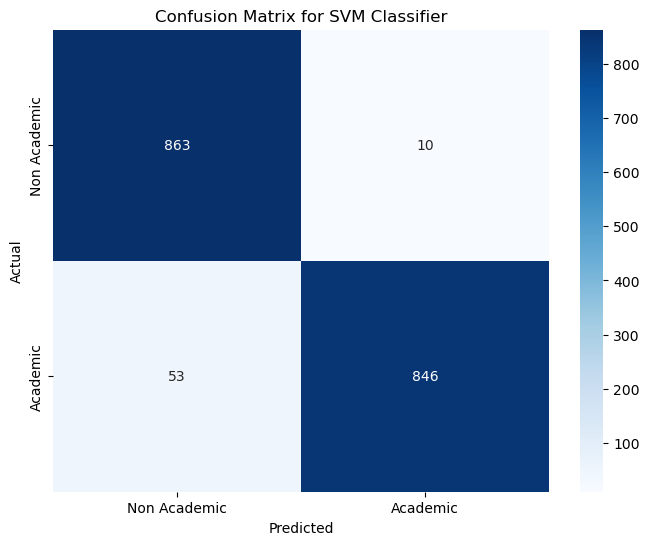

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using the trained classifier and the TF-IDF vectors for test data
y_pred = svc_classifier.predict(X_test_tfidf)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for the SVM classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Academic", "Academic"], yticklabels=["Non Academic", "Academic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()



**Confusion Matrix Report Explanation**

- The model correctly identified 863 cases as "academic" (True Positives).
- The model correctly identified 846 cases as "non academic" (True Negatives).
- The model incorrectly identified 10 cases as "academic" when they were actually "non academic" (False Positives).
- The model incorrectly identified 53 cases as "non academic" when they were actually "academic" (False Negatives).


**Accuracy**
 The accuracy predicted from the model is 96.4%.